# Проектная работа 3 Курс 2021/2022
# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Правка багов и аномалий (тестирование и исправление ошибок)
   4. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)
- *Бонусом можно обучить нейронную сеть, но это если будет желание)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

        Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
        Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r_i = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $


$ s_i = \gamma_{A}M_6 $


$ p_i = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $


$ q_i = \gamma_{J}M_2 $

## 2. План действий

### 2.1 Прямой ход работы
Мы генериеруем ключевые параметры А и В стратегий $v_i$ для двух стадий зоопланктона: молодых и взрослых особей. 

Далее мы с помощью А и В уже находим макропараметры $M_1,...,M_8$ и уже зная их мы можем с помощью имеющихся эмпирических данных посчитать значения функции фитнеса для всех стратегий. 

Следующим шагом нам предстоит воспользоваться сравнением пар получившихся значений фитнеса, чтобы разбить их на два базовых класс и уже эти классы мы предъявим нашему классификатору для непосредственного ранжирования с помощью метода опорных векторов или линейного дискриминанта Фишера 

### 2.2 Программный ход работы

Тут будет описание работы программы но чуточку позже, ближе к концу

## 3. Реализация

### 3.1 Подготовка всех исходных данных

In [1]:
# Эмпирические данные 
alpha_j = 0.0016
alpha_a = 0.006
betta_j = 0.0000007
betta_a = 0.000000075
gamma_j = 0.00008
gamma_a = 0.004
delta_j = 0.000016
delta_a = 0.00006
sigma1 = 1
sigma2 = 1

D = 120
D0 = 70  

Nmax = 40

In [2]:
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров  
def rand_AB(Nmax):
   A_j, B_j, A_a, B_a = [], [], [], []
   for i in range(0, Nmax):
      Aj = round(rn.uniform(-D, 0), 4)
      Bj = round(rn.uniform(-min(Aj + D, -Aj), min(Aj + D, -Aj)), 4)
      A_j.append(Aj)
      B_j.append(Bj)

      Aa = round(rn.uniform(-D, 0), 4)
      Ba = round(rn.uniform(-min(Aa + D, -Aa), min(Aa + D, -Aa)), 4)
      A_a.append(Aa)
      B_a.append(Ba)
   data_strat = {'A_J': A_j, 'B_J': B_j, 'A_A': A_a, 'B_A': B_a}
   data = pd.DataFrame(data = data_strat)
   data.to_csv("data_strat.csv", index=False)
   return data
data_strat = rand_AB(Nmax)
data_strat

,A_J,B_J,A_A,B_A
0,-73.3655,3.7642,-63.5288,-48.5657
1,-107.2853,0.1107,-6.7614,-1.1408
2,-88.8100,28.0262,-77.3055,-40.1670
3,-10.0658,1.1141,-78.8679,1.8782
4,-79.2213,16.3072,-38.1330,31.3684
5,-86.5242,-20.4125,-76.6184,16.6175
6,-63.4243,30.2386,-47.4395,24.5533
7,-75.6482,-35.9461,-1.9082,-0.6296
8,-59.1165,-9.3227,-109.9694,8.4164
9,-47.8341,-28.4944,-21.2162,-2.2126


In [11]:
import pandas as pd
import numpy as np
# Подсчет макропараметров
def macroparams(data_strat):
   Aj = data_strat['A_J'].tolist()
   Bj = data_strat['B_J'].tolist()
   Aa = data_strat['A_A'].tolist()
   Ba = data_strat['B_A'].tolist()
   M1, M2, M3, M4, M5, M6, M7, M8 = [], [], [], [], [], [], [], []
   for i in range(0, Nmax):
      M1.append(sigma1*(Aj[i] + D))
      M2.append(-sigma2*(Aj[i] + D + Bj[i]/2))
      M3.append(-2*(np.pi*Bj[i])**2)
      M4.append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      M5.append(sigma1*(Aa[i] + D))
      M6.append(-sigma2*(Aa[i] + D + Ba[i]/2))
      M7.append(-2*(np.pi*Ba[i])**2)
      M8.append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2))
   M1, M2, M3, M4, M5, M6, M7, M8 = macro_norm(M1, M2, M3, M4, M5, M6, M7, M8)
   data_macro = {'M1': M1, 'M2': M2, 'M3': M3, 'M4': M4, 'M5': M5, 'M6': M6, 'M7': M7, 'M8': M8}
   data = pd.DataFrame(data = data_macro)
   data.to_csv("data_macro.csv", index=False)
   return M1, M2, M3, M4, M5, M6, M7, M8

# Нормализуем макропараметры для увеличения скорости классификатора
def macro_norm(M1, M2, M3, M4, M5, M6, M7, M8):
   M1_n, M2_n, M3_n, M4_n, M5_n, M6_n, M7_n, M8_n = [], [], [], [], [], [], [], []
   for i in range(0, Nmax):
      M1_n.append(M1[i]/max(np.abs(M1)))
      M2_n.append(M2[i]/max(np.abs(M2)))
      M3_n.append(M3[i]/max(np.abs(M3)))
      M4_n.append(M4[i]/max(np.abs(M4)))
      M5_n.append(M5[i]/max(np.abs(M5)))
      M6_n.append(M6[i]/max(np.abs(M6)))
      M7_n.append(M7[i]/max(np.abs(M7)))
      M8_n.append(M8[i]/max(np.abs(M8)))
   return M1_n, M2_n, M3_n, M4_n, M5_n, M6_n, M7_n, M8_n

In [12]:
import pandas as pd
# Считаем фитнесс
def fitness(Nmax):
   M1, M2, M3, M4, M5, M6, M7, M8 = macroparams(data_strat)
   J = []
   r, s, p, q = 0, 0, 0, 0
   for i in range(0, Nmax):
      r = alpha_a*M5[i] + betta_a*M7[i] + delta_a*M8[i]
      s = gamma_a*M6[i]
      p = alpha_j*M1[i] + betta_j*M3[i] + delta_j*M4[i]
      q = gamma_j*M2[i]
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   return data

data_fit_macro = fitness(Nmax)
data_fit_macro

,J,M1,M2,M3,M4,M5,M6,M7,M8
0,0.003691,0.407225,-0.426865,-0.006832,-0.004421,0.478197,-0.272751,-0.717754,-0.263375
1,0.008104,0.111028,-0.112355,-0.000006,-0.333859,0.958903,-0.954705,-0.000396,-0.862635
2,0.002623,0.272359,-0.397712,-0.378743,-0.179285,0.361537,-0.191597,-0.490970,-0.185491
3,0.004559,0.959974,-0.972138,-0.000599,-0.862799,0.348306,-0.356495,-0.001073,-0.017341
4,0.007689,0.356090,-0.430522,-0.128226,-0.052352,0.693249,-0.826610,-0.299434,-0.325123
5,0.004294,0.292319,-0.204733,-0.200913,-0.115605,0.367355,-0.438003,-0.084033,-0.039225
6,0.007102,0.494034,-0.630796,-0.440899,-0.120178,0.614441,-0.718876,-0.183458,-0.174782
7,0.009370,0.387291,-0.232089,-0.623045,-0.162814,1.000000,-0.997995,-0.000121,-1.000000
8,0.001498,0.531651,-0.494661,-0.041908,-0.038882,0.084939,-0.120654,-0.021556,-0.352184
9,0.008537,0.630171,-0.509588,-0.391503,-0.215486,0.836500,-0.827680,-0.001490,-0.513795


In [48]:
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
      
def data_class():
   data_fit_macro = fitness(Nmax)
   target = []
   for i in range(0, Nmax):
      for j in range(i + 1, Nmax):
         differ_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         target_ = classificator(differ_)
         target.append(differ_.append(pd.Series(target_, index =['target'])))
   data = pd.DataFrame(columns=['J', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'target'], data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data = data_class()
data


,J,M1,M2,M3,M4,M5,M6,M7,M8,target
0,-0.004412,0.296196,-0.314510,-0.006826,0.329437,-0.480706,0.681954,-0.717358,0.599259,-1.0
1,0.001068,0.134865,-0.029153,0.371911,0.174864,0.116661,-0.081155,-0.226784,-0.077884,1.0
2,-0.000868,-0.552749,0.545273,-0.006234,0.858378,0.129891,0.083743,-0.716681,-0.246035,-1.0
3,-0.003997,0.051134,0.003657,0.121393,0.047930,-0.215051,0.553859,-0.418320,0.061747,-1.0
4,-0.000602,0.114905,-0.222132,0.194081,0.111184,0.110843,0.165252,-0.633722,-0.224150,-1.0
...,...,...,...,...,...,...,...,...,...,...
775,-0.004374,-0.239524,0.379955,0.402004,-0.315573,-0.196635,0.485496,0.307099,0.021437,-1.0
776,0.000093,-0.020427,0.045563,0.001716,-0.049119,0.151651,-0.000305,-0.191386,0.158435,1.0
777,0.002791,0.649869,-0.491260,0.372756,-0.599697,0.299033,-0.148996,0.512527,-0.131289,1.0
778,0.007258,0.868965,-0.825652,-0.027532,-0.333243,0.647319,-0.634796,0.014042,0.005709,1.0


### 3.2 Реализация машинного обучения для SVM, LDA

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data.iloc[:, 1:-1].values 
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # 1 и 27 - для максимально точных результатов

In [46]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получим коэффициенты гиперплоскости
SVC_model.coef_

array([[ 1.8939799 , -0.14752297,  0.04559664,  0.171243  ,  3.5786017 ,
        -5.84689409, -0.24636116, -0.28931863]])

In [47]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получим коэффициенты гиперплоскости
LDA_model.coef_

array([[ 3.83856547e+00,  1.36577298e+00,  1.04376301e-01,
         1.65706893e-01,  3.05100827e+00, -8.39660681e+00,
         4.54754326e-03, -1.01752578e+00]])

In [23]:
# Считаем разницу SVM и LDA
from sklearn.metrics import accuracy_score
print('Точность метода опорных векторов: ', accuracy_score(SVC_prediction, y_test))
print('Точность Фишеровского дискриминанта: ', accuracy_score(LDA_prediction, y_test)) 

Точность метода опорных векторов:  0.9551282051282052
Точность Фишеровского дискриминанта:  0.9358974358974359


### 3.3 Графики 

No handles with labels found to put in legend.


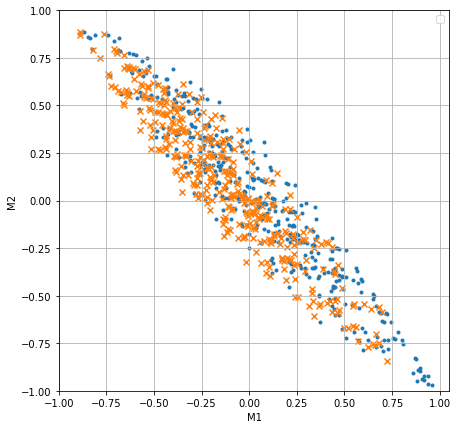

No handles with labels found to put in legend.


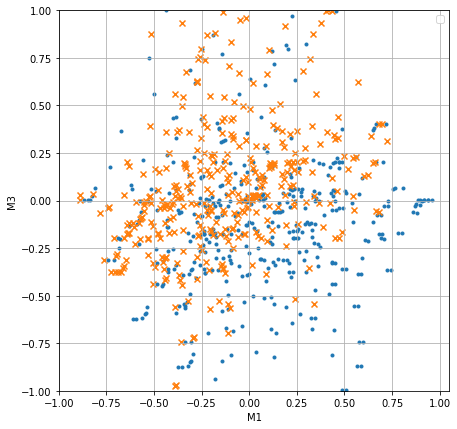

No handles with labels found to put in legend.


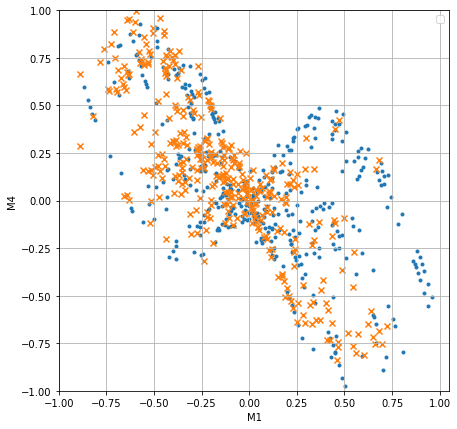

No handles with labels found to put in legend.


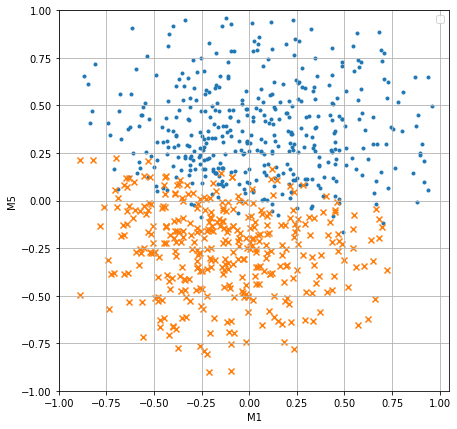

No handles with labels found to put in legend.


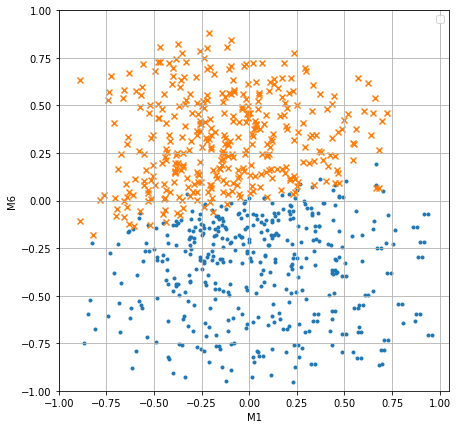

No handles with labels found to put in legend.


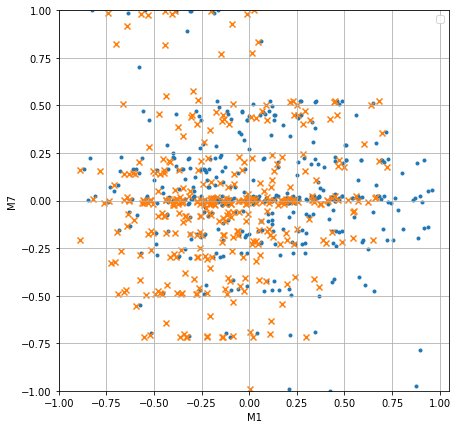

No handles with labels found to put in legend.


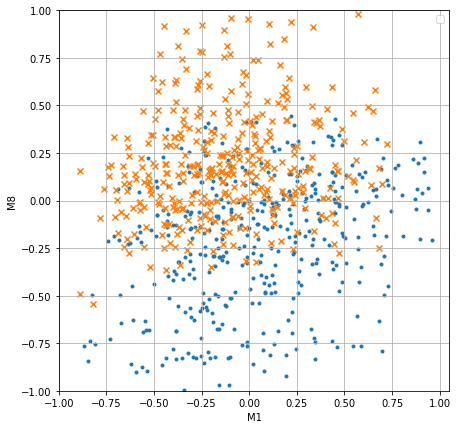

No handles with labels found to put in legend.


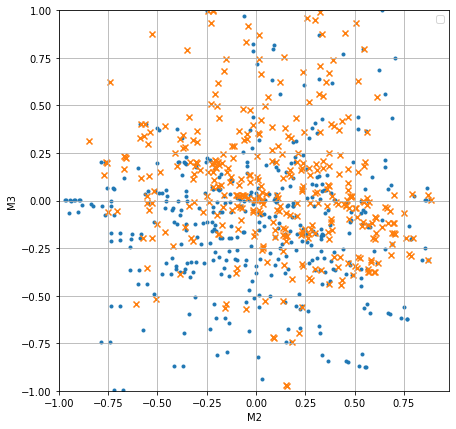

No handles with labels found to put in legend.


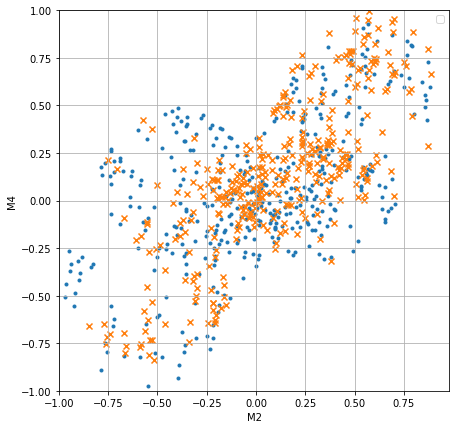

No handles with labels found to put in legend.


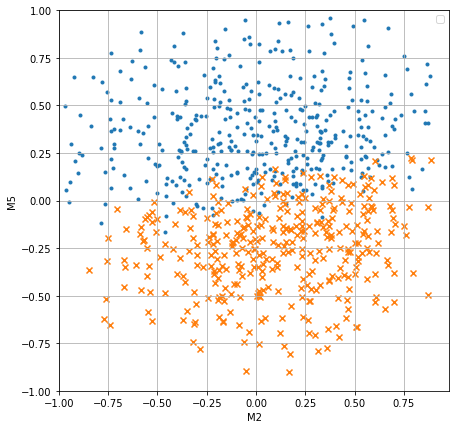

No handles with labels found to put in legend.


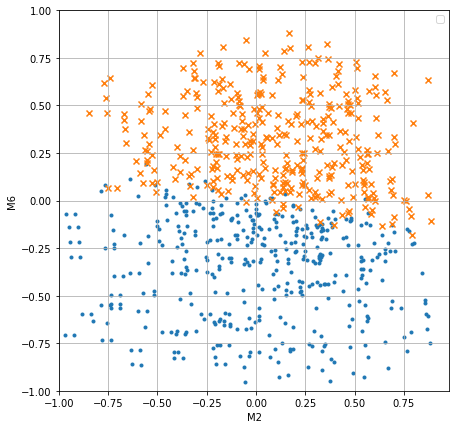

No handles with labels found to put in legend.


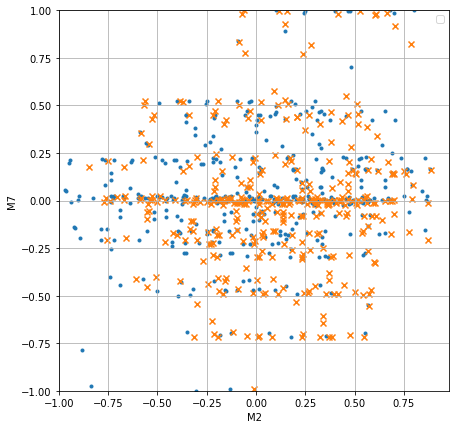

No handles with labels found to put in legend.


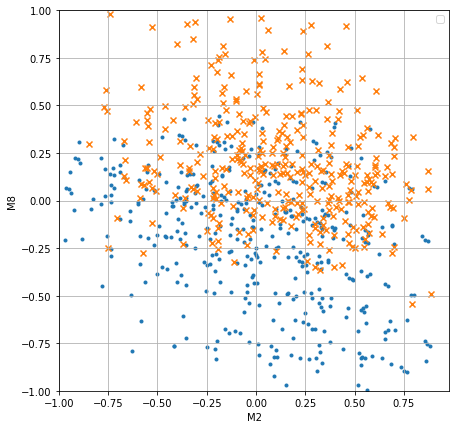

No handles with labels found to put in legend.


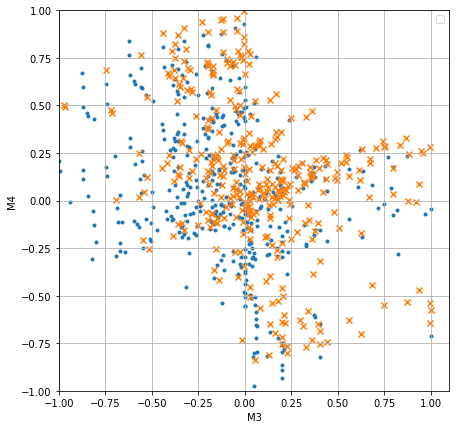

No handles with labels found to put in legend.


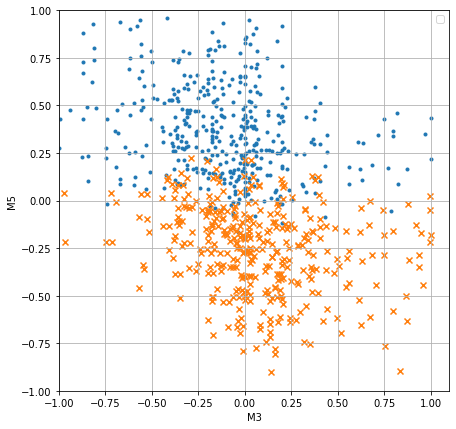

No handles with labels found to put in legend.


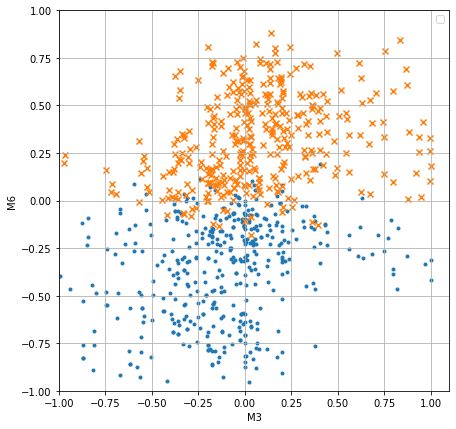

No handles with labels found to put in legend.


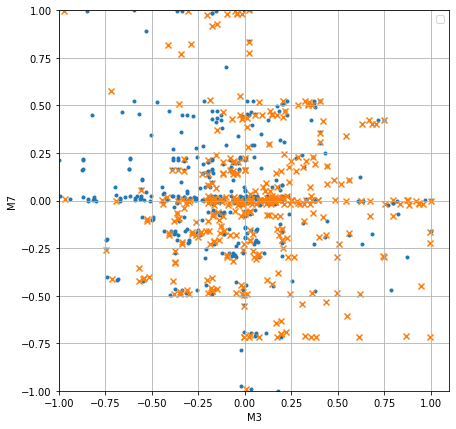

No handles with labels found to put in legend.


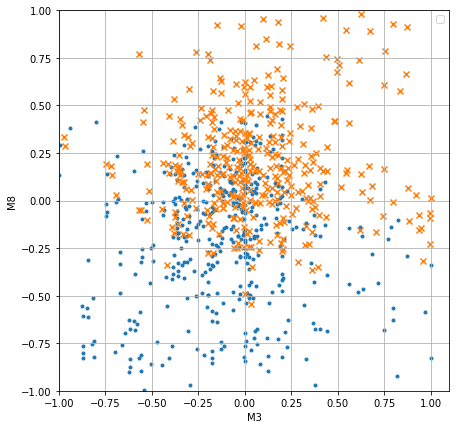

No handles with labels found to put in legend.


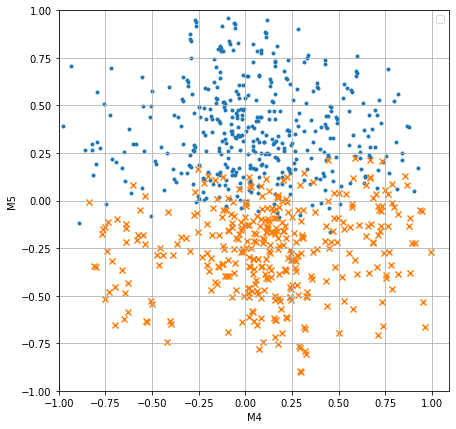

No handles with labels found to put in legend.


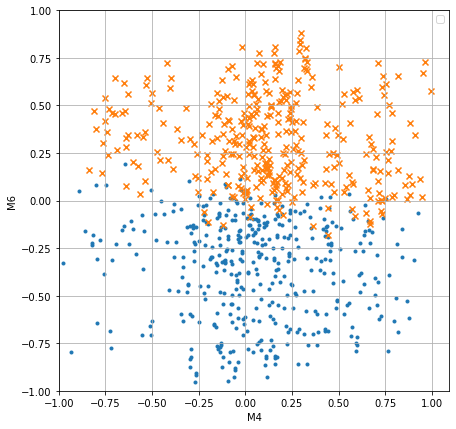

No handles with labels found to put in legend.


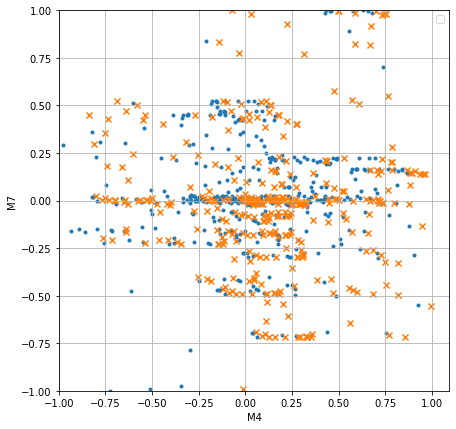

No handles with labels found to put in legend.


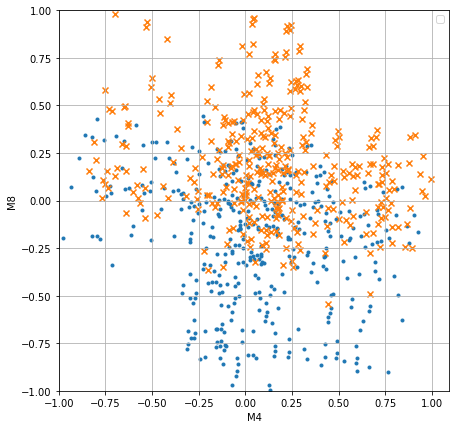

No handles with labels found to put in legend.


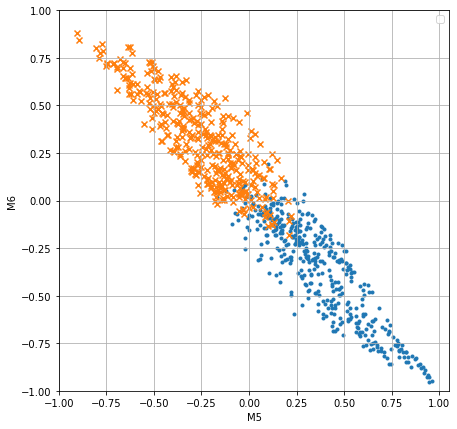

No handles with labels found to put in legend.


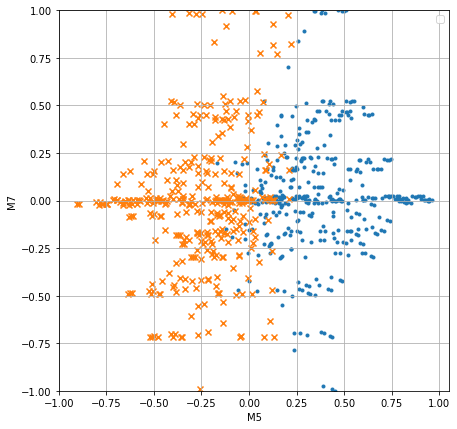

No handles with labels found to put in legend.


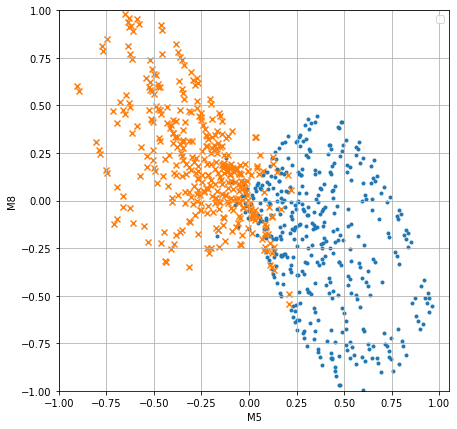

No handles with labels found to put in legend.


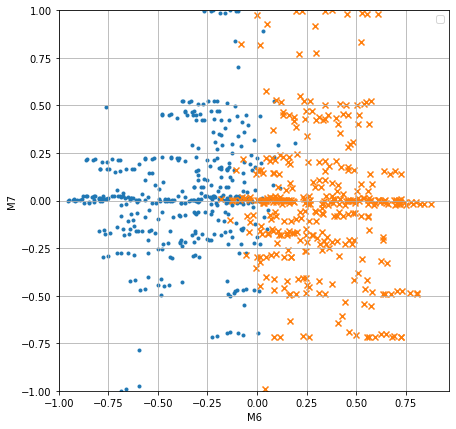

No handles with labels found to put in legend.


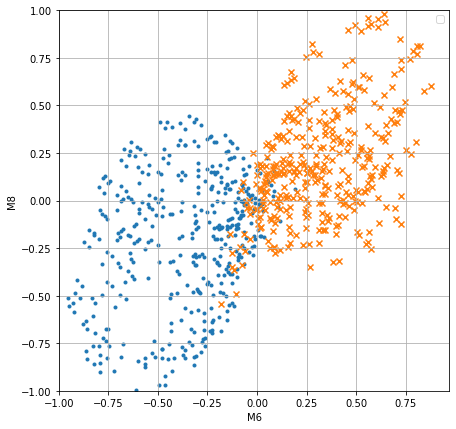

No handles with labels found to put in legend.


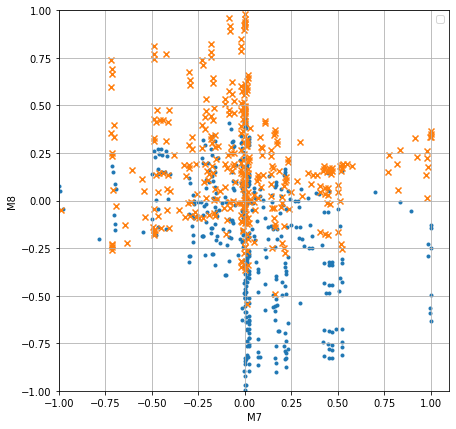

In [51]:
# Тут будут графики и все такие дела
X=data_class().loc[:,'M1':'M8']
y=data_class().loc[:,'target']

import matplotlib.pyplot as plt
%matplotlib inline

X1 = X[y==1]
X0 = X[y==-1]

for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.xlim(-1,)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show()